In [1]:
#Step 1: Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Step 2: Loading the dataset
df = pd.read_csv('heart.csv')

#Step 3: Data Preprocessing and Data Cleaning
# Checking for null values
df.isnull().sum()


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [2]:
#since slope, thal and ca contain more than 50% of null values, we will drop them
df.drop(['slope', 'thal', 'ca'], axis=1, inplace=True)
# Filling numerical columns with median values

# Impute (fill in) missing values for numerical columns using the median.
# The median is robust to outliers and is a good choice for imputation.
numerical_cols = ['trestbps', 'chol', 'thalch', 'oldpeak']
for col in numerical_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)


# Impute missing values for categorical columns using the mode (most frequent value).
categorical_cols_to_impute = ['fbs', 'exang', 'restecg']
for col in categorical_cols_to_impute:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

df.isnull().sum()


C:\Users\saaja\AppData\Local\Temp\ipykernel_17816\2264743203.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
C:\Users\saaja\AppData\Local\Temp\ipykernel_17816\2264743203.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64

Model Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.75      0.80      0.77        75
 Has Disease       0.86      0.82      0.84       109

    accuracy                           0.81       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.81      0.81       184



Confusion Matrix:


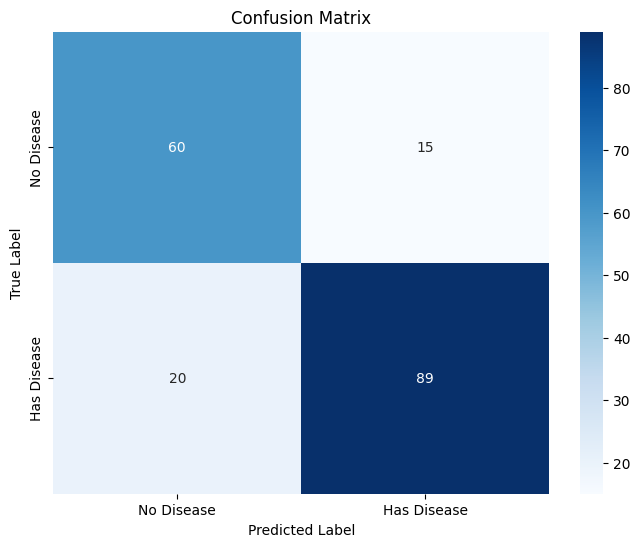

In [6]:
# --- Step 4: Feature Engineering and Final Preparation ---

# Create the binary target variable.
# 'num' > 0 indicates the presence of heart disease (1), otherwise it's 0.
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Identify all categorical columns that need to be converted to numbers.
categorical_cols = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang']

# Apply one-hot encoding to convert categorical variables into a numerical format.
# 'drop_first=True' is used to avoid multicollinearity.
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Drop original columns that are no longer needed.
df_encoded.drop(['id', 'num'], axis=1, inplace=True)


#Step 5: Splitting the dataset into training and testing sets
x = df_encoded.drop('target', axis=1)
y = df_encoded['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Scale the numerical features.
# This standardizes the features to have a mean of 0 and a standard deviation of 1,
# which helps the logistic regression model perform better.
# Note: We only fit the scaler on the training data to avoid data leakage.
scaler = StandardScaler()
numerical_feature_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
x_train[numerical_feature_cols] = scaler.fit_transform(x_train[numerical_feature_cols])
x_test[numerical_feature_cols] = scaler.transform(x_test[numerical_feature_cols])


#Step 6: Model Training and Evaluation
# Initialize the logistic regression model.
model = LogisticRegression(max_iter=1000)
# Fit the model on the training data.
model.fit(x_train, y_train)
# Make predictions on the test set.
predictions = model.predict(x_test)

# --- Step 7: Display Model Performance ---

# Calculate and print the overall accuracy of the model.
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy:.2f}\n")

# Print a detailed classification report showing precision, recall, and F1-score.
print("Classification Report:")
print(classification_report(y_test, predictions, target_names=['No Disease', 'Has Disease']))
print("\n")

# Generate and plot a confusion matrix to visualize the model's performance.
print("Confusion Matrix:")
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Has Disease'],
            yticklabels=['No Disease', 'Has Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
